In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 10,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   #"hessian_percentile" : 95,
                   #"grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 300,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (9,9),
                "tau" : (0.999, 0.9991),
                #"ewc_lambda" : (200,200)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
import pickle
with open("logs/task_number.pkl", "rb") as f:
    test_accs_matrix = pickle.load(f)
test_accs_matrix

2

In [4]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [5]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [6]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [7]:
device = get_device(2)

## Get benchmarks

In [8]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [9]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-08-09 10:30:37,278] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:57<00:00,  6.39s/it]
[I 2024-08-09 10:31:44,308] Trial 0 finished with value: 97.3722580645161 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 97.3722580645161.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.35s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:44,  6.32s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 78%|███████▊  | 7/9 [00:44<00:12,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.33s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.32s/it]
[I 2024-08-09 10:33:00,004] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 9/9 [00:56<00:00,  6.30s/it]
[I 2024-08-09 10:34:06,574] Trial 0 finished with value: 90.10526881720429 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 90.10526881720429.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 302
fc2 : in = 302, out = 303
fc3 : in = 303, out = 10
Non frozen params in layer 1 : tensor(91503., device='cuda:2')
Non frozen params in layer 2 : tensor(3027., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:44,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 302
fc2 : in = 302, out = 303
fc3 : in = 303, out = 10
Non frozen params in layer 1 : tensor(91503., device='cuda:2')
Non frozen params in layer 2 : tensor(3027., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 305
fc2 : in = 305, out = 303
fc3 : in = 303, out = 10
Non frozen params in layer 1 : tensor(92409., device='cuda:2')
Non frozen params in layer 2 : tensor(3027., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 308
fc2 : in = 308, out = 306
fc3 : in = 306, out = 10
Non frozen params in layer 1 : tensor(94239., device='cuda:2')
Non frozen params in layer 2 : tensor(3054., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 308
fc2 : in = 308, out = 309
fc3 : in = 309, out = 10
Non frozen params in layer 1 : tensor(95163., device='cuda:2')
Non frozen params in layer 2 : tensor(3081., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 308
fc2 : in = 308, out = 309
fc3 : in = 309, out = 10
Non frozen params in layer 1 : tensor(95163., device='cuda:2')
Non frozen params in layer 2 : tensor(3081., device='cuda:2')


 78%|███████▊  | 7/9 [00:43<00:12,  6.19s/it]

In and out sizes :
fc1 : in = 784, out = 311
fc2 : in = 311, out = 309
fc3 : in = 309, out = 10
Non frozen params in layer 1 : tensor(96087., device='cuda:2')
Non frozen params in layer 2 : tensor(3081., device='cuda:2')


 89%|████████▉ | 8/9 [00:49<00:06,  6.16s/it]

In and out sizes :
fc1 : in = 784, out = 311
fc2 : in = 311, out = 309
fc3 : in = 309, out = 10
Non frozen params in layer 1 : tensor(96087., device='cuda:2')
Non frozen params in layer 2 : tensor(3081., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.22s/it]
[I 2024-08-09 10:35:21,206] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 9/9 [00:56<00:00,  6.25s/it]
[I 2024-08-09 10:36:29,257] Trial 0 finished with value: 82.0370250896057 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 82.0370250896057.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 314
fc2 : in = 314, out = 312
fc3 : in = 312, out = 10
Non frozen params in layer 1 : tensor(97953., device='cuda:2')
Non frozen params in layer 2 : tensor(3108., device='cuda:2')


 11%|█         | 1/9 [00:06<00:49,  6.25s/it]

In and out sizes :
fc1 : in = 784, out = 314
fc2 : in = 314, out = 312
fc3 : in = 312, out = 10
Non frozen params in layer 1 : tensor(97953., device='cuda:2')
Non frozen params in layer 2 : tensor(3108., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 314
fc2 : in = 314, out = 312
fc3 : in = 312, out = 10
Non frozen params in layer 1 : tensor(97953., device='cuda:2')
Non frozen params in layer 2 : tensor(3108., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 314
fc2 : in = 314, out = 312
fc3 : in = 312, out = 10
Non frozen params in layer 1 : tensor(97953., device='cuda:2')
Non frozen params in layer 2 : tensor(3108., device='cuda:2')


 44%|████▍     | 4/9 [00:24<00:31,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 314
fc2 : in = 314, out = 312
fc3 : in = 312, out = 10
Non frozen params in layer 1 : tensor(97953., device='cuda:2')
Non frozen params in layer 2 : tensor(3108., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:24,  6.25s/it]

In and out sizes :
fc1 : in = 784, out = 317
fc2 : in = 317, out = 315
fc3 : in = 315, out = 10
Non frozen params in layer 1 : tensor(99837., device='cuda:2')
Non frozen params in layer 2 : tensor(3135., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 319
fc2 : in = 319, out = 315
fc3 : in = 315, out = 10
Non frozen params in layer 1 : tensor(100464., device='cuda:2')
Non frozen params in layer 2 : tensor(3135., device='cuda:2')


 78%|███████▊  | 7/9 [00:43<00:12,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 318
fc3 : in = 318, out = 10
Non frozen params in layer 1 : tensor(102372., device='cuda:2')
Non frozen params in layer 2 : tensor(3162., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 318
fc3 : in = 318, out = 10
Non frozen params in layer 1 : tensor(102372., device='cuda:2')
Non frozen params in layer 2 : tensor(3162., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.27s/it]
[I 2024-08-09 10:37:44,230] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


100%|██████████| 9/9 [00:55<00:00,  6.13s/it]
[I 2024-08-09 10:38:52,173] Trial 0 finished with value: 76.34018817204301 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 76.34018817204301.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 318
fc3 : in = 318, out = 10
Non frozen params in layer 1 : tensor(102372., device='cuda:2')
Non frozen params in layer 2 : tensor(3162., device='cuda:2')


 11%|█         | 1/9 [00:06<00:49,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 318
fc3 : in = 318, out = 10
Non frozen params in layer 1 : tensor(102372., device='cuda:2')
Non frozen params in layer 2 : tensor(3162., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 322
fc2 : in = 322, out = 318
fc3 : in = 318, out = 10
Non frozen params in layer 1 : tensor(102372., device='cuda:2')
Non frozen params in layer 2 : tensor(3162., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 326
fc2 : in = 326, out = 322
fc3 : in = 322, out = 10
Non frozen params in layer 1 : tensor(104944., device='cuda:2')
Non frozen params in layer 2 : tensor(3198., device='cuda:2')


 44%|████▍     | 4/9 [00:24<00:31,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 330
fc2 : in = 330, out = 322
fc3 : in = 322, out = 10
Non frozen params in layer 1 : tensor(106228., device='cuda:2')
Non frozen params in layer 2 : tensor(3198., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:24,  6.21s/it]

In and out sizes :
fc1 : in = 784, out = 330
fc2 : in = 330, out = 322
fc3 : in = 322, out = 10
Non frozen params in layer 1 : tensor(106228., device='cuda:2')
Non frozen params in layer 2 : tensor(3198., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.19s/it]

In and out sizes :
fc1 : in = 784, out = 330
fc2 : in = 330, out = 322
fc3 : in = 322, out = 10
Non frozen params in layer 1 : tensor(106228., device='cuda:2')
Non frozen params in layer 2 : tensor(3198., device='cuda:2')


 78%|███████▊  | 7/9 [00:43<00:12,  6.20s/it]

In and out sizes :
fc1 : in = 784, out = 330
fc2 : in = 330, out = 326
fc3 : in = 326, out = 10
Non frozen params in layer 1 : tensor(107548., device='cuda:2')
Non frozen params in layer 2 : tensor(3234., device='cuda:2')


 89%|████████▉ | 8/9 [00:49<00:06,  6.20s/it]

In and out sizes :
fc1 : in = 784, out = 330
fc2 : in = 330, out = 326
fc3 : in = 326, out = 10
Non frozen params in layer 1 : tensor(107548., device='cuda:2')
Non frozen params in layer 2 : tensor(3234., device='cuda:2')


100%|██████████| 9/9 [00:55<00:00,  6.21s/it]
[I 2024-08-09 10:40:06,770] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


100%|██████████| 9/9 [00:56<00:00,  6.31s/it]
[I 2024-08-09 10:41:17,671] Trial 0 finished with value: 71.3527311827957 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 71.3527311827957.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 330
fc2 : in = 330, out = 326
fc3 : in = 326, out = 10
Non frozen params in layer 1 : tensor(107548., device='cuda:2')
Non frozen params in layer 2 : tensor(3234., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 334
fc2 : in = 334, out = 326
fc3 : in = 326, out = 10
Non frozen params in layer 1 : tensor(108848., device='cuda:2')
Non frozen params in layer 2 : tensor(3234., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 334
fc2 : in = 334, out = 330
fc3 : in = 330, out = 10
Non frozen params in layer 1 : tensor(110184., device='cuda:2')
Non frozen params in layer 2 : tensor(3270., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 338
fc2 : in = 338, out = 330
fc3 : in = 330, out = 10
Non frozen params in layer 1 : tensor(111500., device='cuda:2')
Non frozen params in layer 2 : tensor(3270., device='cuda:2')


 44%|████▍     | 4/9 [00:24<00:31,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 338
fc2 : in = 338, out = 330
fc3 : in = 330, out = 10
Non frozen params in layer 1 : tensor(111500., device='cuda:2')
Non frozen params in layer 2 : tensor(3270., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 338
fc2 : in = 338, out = 334
fc3 : in = 334, out = 10
Non frozen params in layer 1 : tensor(112852., device='cuda:2')
Non frozen params in layer 2 : tensor(3306., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 342
fc2 : in = 342, out = 334
fc3 : in = 334, out = 10
Non frozen params in layer 1 : tensor(114184., device='cuda:2')
Non frozen params in layer 2 : tensor(3306., device='cuda:2')


 78%|███████▊  | 7/9 [00:43<00:12,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 346
fc2 : in = 346, out = 338
fc3 : in = 338, out = 10
Non frozen params in layer 1 : tensor(116900., device='cuda:2')
Non frozen params in layer 2 : tensor(3342., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.25s/it]

In and out sizes :
fc1 : in = 784, out = 346
fc2 : in = 346, out = 342
fc3 : in = 342, out = 10
Non frozen params in layer 1 : tensor(118284., device='cuda:2')
Non frozen params in layer 2 : tensor(3378., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.26s/it]
[I 2024-08-09 10:42:31,962] A new study created in memory with name: Search number 6



--------------------------------------------------
LEARNING TASK 6


100%|██████████| 9/9 [00:55<00:00,  6.22s/it]
[I 2024-08-09 10:43:43,554] Trial 0 finished with value: 69.01186379928315 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 69.01186379928315.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 352
fc2 : in = 352, out = 346
fc3 : in = 346, out = 10
Non frozen params in layer 1 : tensor(121738., device='cuda:2')
Non frozen params in layer 2 : tensor(3414., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.35s/it]

In and out sizes :
fc1 : in = 784, out = 352
fc2 : in = 352, out = 346
fc3 : in = 346, out = 10
Non frozen params in layer 1 : tensor(121738., device='cuda:2')
Non frozen params in layer 2 : tensor(3414., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 352
fc2 : in = 352, out = 346
fc3 : in = 346, out = 10
Non frozen params in layer 1 : tensor(121738., device='cuda:2')
Non frozen params in layer 2 : tensor(3414., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 356
fc2 : in = 356, out = 346
fc3 : in = 346, out = 10
Non frozen params in layer 1 : tensor(123118., device='cuda:2')
Non frozen params in layer 2 : tensor(3414., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 356
fc2 : in = 356, out = 350
fc3 : in = 350, out = 10
Non frozen params in layer 1 : tensor(124542., device='cuda:2')
Non frozen params in layer 2 : tensor(3450., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:24,  6.25s/it]

In and out sizes :
fc1 : in = 784, out = 360
fc2 : in = 360, out = 350
fc3 : in = 350, out = 10
Non frozen params in layer 1 : tensor(125938., device='cuda:2')
Non frozen params in layer 2 : tensor(3450., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 360
fc2 : in = 360, out = 354
fc3 : in = 354, out = 10
Non frozen params in layer 1 : tensor(127378., device='cuda:2')
Non frozen params in layer 2 : tensor(3486., device='cuda:2')


 78%|███████▊  | 7/9 [00:43<00:12,  6.23s/it]

In and out sizes :
fc1 : in = 784, out = 360
fc2 : in = 360, out = 354
fc3 : in = 354, out = 10
Non frozen params in layer 1 : tensor(127378., device='cuda:2')
Non frozen params in layer 2 : tensor(3486., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.25s/it]

In and out sizes :
fc1 : in = 784, out = 364
fc2 : in = 364, out = 354
fc3 : in = 354, out = 10
Non frozen params in layer 1 : tensor(128790., device='cuda:2')
Non frozen params in layer 2 : tensor(3486., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.25s/it]
[I 2024-08-09 10:44:58,615] A new study created in memory with name: Search number 7



--------------------------------------------------
LEARNING TASK 7


100%|██████████| 9/9 [00:56<00:00,  6.28s/it]
[I 2024-08-09 10:46:12,576] Trial 0 finished with value: 66.9966973886329 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 66.9966973886329.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 364
fc2 : in = 364, out = 358
fc3 : in = 358, out = 10
Non frozen params in layer 1 : tensor(130246., device='cuda:2')
Non frozen params in layer 2 : tensor(3522., device='cuda:2')


 11%|█         | 1/9 [00:06<00:49,  6.22s/it]

In and out sizes :
fc1 : in = 784, out = 368
fc2 : in = 368, out = 358
fc3 : in = 358, out = 10
Non frozen params in layer 1 : tensor(131674., device='cuda:2')
Non frozen params in layer 2 : tensor(3522., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 368
fc2 : in = 368, out = 362
fc3 : in = 362, out = 10
Non frozen params in layer 1 : tensor(133146., device='cuda:2')
Non frozen params in layer 2 : tensor(3558., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.33s/it]

In and out sizes :
fc1 : in = 784, out = 368
fc2 : in = 368, out = 362
fc3 : in = 362, out = 10
Non frozen params in layer 1 : tensor(133146., device='cuda:2')
Non frozen params in layer 2 : tensor(3558., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 368
fc2 : in = 368, out = 362
fc3 : in = 362, out = 10
Non frozen params in layer 1 : tensor(133146., device='cuda:2')
Non frozen params in layer 2 : tensor(3558., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 372
fc2 : in = 372, out = 366
fc3 : in = 366, out = 10
Non frozen params in layer 1 : tensor(136078., device='cuda:2')
Non frozen params in layer 2 : tensor(3594., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 372
fc2 : in = 372, out = 366
fc3 : in = 366, out = 10
Non frozen params in layer 1 : tensor(136078., device='cuda:2')
Non frozen params in layer 2 : tensor(3594., device='cuda:2')


 78%|███████▊  | 7/9 [00:44<00:12,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 376
fc2 : in = 376, out = 370
fc3 : in = 370, out = 10
Non frozen params in layer 1 : tensor(139042., device='cuda:2')
Non frozen params in layer 2 : tensor(3630., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 380
fc2 : in = 380, out = 374
fc3 : in = 374, out = 10
Non frozen params in layer 1 : tensor(142038., device='cuda:2')
Non frozen params in layer 2 : tensor(3666., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.31s/it]
[I 2024-08-09 10:47:27,989] A new study created in memory with name: Search number 8



--------------------------------------------------
LEARNING TASK 8


100%|██████████| 9/9 [00:56<00:00,  6.24s/it]
[I 2024-08-09 10:48:42,532] Trial 0 finished with value: 58.58451612903226 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 58.58451612903226.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 384
fc2 : in = 384, out = 378
fc3 : in = 378, out = 10
Non frozen params in layer 1 : tensor(145066., device='cuda:2')
Non frozen params in layer 2 : tensor(3702., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 388
fc2 : in = 388, out = 378
fc3 : in = 378, out = 10
Non frozen params in layer 1 : tensor(146574., device='cuda:2')
Non frozen params in layer 2 : tensor(3702., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 388
fc2 : in = 388, out = 378
fc3 : in = 378, out = 10
Non frozen params in layer 1 : tensor(146574., device='cuda:2')
Non frozen params in layer 2 : tensor(3702., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.25s/it]

In and out sizes :
fc1 : in = 784, out = 388
fc2 : in = 388, out = 378
fc3 : in = 378, out = 10
Non frozen params in layer 1 : tensor(146574., device='cuda:2')
Non frozen params in layer 2 : tensor(3702., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 396
fc2 : in = 396, out = 386
fc3 : in = 386, out = 10
Non frozen params in layer 1 : tensor(152758., device='cuda:2')
Non frozen params in layer 2 : tensor(3774., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 396
fc2 : in = 396, out = 390
fc3 : in = 390, out = 10
Non frozen params in layer 1 : tensor(154342., device='cuda:2')
Non frozen params in layer 2 : tensor(3810., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 396
fc2 : in = 396, out = 390
fc3 : in = 390, out = 10
Non frozen params in layer 1 : tensor(154342., device='cuda:2')
Non frozen params in layer 2 : tensor(3810., device='cuda:2')


 78%|███████▊  | 7/9 [00:44<00:12,  6.31s/it]

In and out sizes :
fc1 : in = 784, out = 400
fc2 : in = 400, out = 394
fc3 : in = 394, out = 10
Non frozen params in layer 1 : tensor(157498., device='cuda:2')
Non frozen params in layer 2 : tensor(3846., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.32s/it]

In and out sizes :
fc1 : in = 784, out = 404
fc2 : in = 404, out = 394
fc3 : in = 394, out = 10
Non frozen params in layer 1 : tensor(159070., device='cuda:2')
Non frozen params in layer 2 : tensor(3846., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.29s/it]
[I 2024-08-09 10:49:57,555] A new study created in memory with name: Search number 9



--------------------------------------------------
LEARNING TASK 9


100%|██████████| 9/9 [00:56<00:00,  6.27s/it]
[I 2024-08-09 10:51:14,051] Trial 0 finished with value: 52.67335722819595 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 52.67335722819595.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 404
fc2 : in = 404, out = 398
fc3 : in = 398, out = 10
Non frozen params in layer 1 : tensor(160686., device='cuda:2')
Non frozen params in layer 2 : tensor(3882., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 404
fc2 : in = 404, out = 398
fc3 : in = 398, out = 10
Non frozen params in layer 1 : tensor(160686., device='cuda:2')
Non frozen params in layer 2 : tensor(3882., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 408
fc2 : in = 408, out = 398
fc3 : in = 398, out = 10
Non frozen params in layer 1 : tensor(162274., device='cuda:2')
Non frozen params in layer 2 : tensor(3882., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 412
fc2 : in = 412, out = 402
fc3 : in = 402, out = 10
Non frozen params in layer 1 : tensor(165510., device='cuda:2')
Non frozen params in layer 2 : tensor(3918., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 412
fc2 : in = 412, out = 402
fc3 : in = 402, out = 10
Non frozen params in layer 1 : tensor(165510., device='cuda:2')
Non frozen params in layer 2 : tensor(3918., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 412
fc2 : in = 412, out = 406
fc3 : in = 406, out = 10
Non frozen params in layer 1 : tensor(167158., device='cuda:2')
Non frozen params in layer 2 : tensor(3954., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 412
fc2 : in = 412, out = 406
fc3 : in = 406, out = 10
Non frozen params in layer 1 : tensor(167158., device='cuda:2')
Non frozen params in layer 2 : tensor(3954., device='cuda:2')


 78%|███████▊  | 7/9 [00:43<00:12,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 416
fc2 : in = 416, out = 410
fc3 : in = 410, out = 10
Non frozen params in layer 1 : tensor(170442., device='cuda:2')
Non frozen params in layer 2 : tensor(3990., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.32s/it]

In and out sizes :
fc1 : in = 784, out = 424
fc2 : in = 424, out = 414
fc3 : in = 414, out = 10
Non frozen params in layer 1 : tensor(175410., device='cuda:2')
Non frozen params in layer 2 : tensor(4026., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.29s/it]
[I 2024-08-09 10:52:29,370] A new study created in memory with name: Search number 10



--------------------------------------------------
LEARNING TASK 10


100%|██████████| 9/9 [00:56<00:00,  6.26s/it]
[I 2024-08-09 10:53:47,157] Trial 0 finished with value: 44.70355913978494 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}. Best is trial 0 with value: 44.70355913978494.
  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 424
fc2 : in = 424, out = 414
fc3 : in = 414, out = 10
Non frozen params in layer 1 : tensor(175410., device='cuda:2')
Non frozen params in layer 2 : tensor(4026., device='cuda:2')


 11%|█         | 1/9 [00:06<00:49,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 429
fc2 : in = 429, out = 414
fc3 : in = 414, out = 10
Non frozen params in layer 1 : tensor(177475., device='cuda:2')
Non frozen params in layer 2 : tensor(4026., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 429
fc2 : in = 429, out = 418
fc3 : in = 418, out = 10
Non frozen params in layer 1 : tensor(179191., device='cuda:2')
Non frozen params in layer 2 : tensor(4062., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.33s/it]

In and out sizes :
fc1 : in = 784, out = 433
fc2 : in = 433, out = 418
fc3 : in = 418, out = 10
Non frozen params in layer 1 : tensor(180859., device='cuda:2')
Non frozen params in layer 2 : tensor(4062., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.30s/it]

In and out sizes :
fc1 : in = 784, out = 433
fc2 : in = 433, out = 422
fc3 : in = 422, out = 10
Non frozen params in layer 1 : tensor(182591., device='cuda:2')
Non frozen params in layer 2 : tensor(4098., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 437
fc2 : in = 437, out = 422
fc3 : in = 422, out = 10
Non frozen params in layer 1 : tensor(184275., device='cuda:2')
Non frozen params in layer 2 : tensor(4098., device='cuda:2')


 67%|██████▋   | 6/9 [00:37<00:18,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 437
fc2 : in = 437, out = 426
fc3 : in = 426, out = 10
Non frozen params in layer 1 : tensor(186023., device='cuda:2')
Non frozen params in layer 2 : tensor(4134., device='cuda:2')


 78%|███████▊  | 7/9 [00:44<00:12,  6.29s/it]

In and out sizes :
fc1 : in = 784, out = 441
fc2 : in = 441, out = 426
fc3 : in = 426, out = 10
Non frozen params in layer 1 : tensor(187723., device='cuda:2')
Non frozen params in layer 2 : tensor(4134., device='cuda:2')


 89%|████████▉ | 8/9 [00:50<00:06,  6.28s/it]

In and out sizes :
fc1 : in = 784, out = 441
fc2 : in = 441, out = 426
fc3 : in = 426, out = 10
Non frozen params in layer 1 : tensor(187723., device='cuda:2')
Non frozen params in layer 2 : tensor(4134., device='cuda:2')


100%|██████████| 9/9 [00:56<00:00,  6.29s/it]


## Visualize results

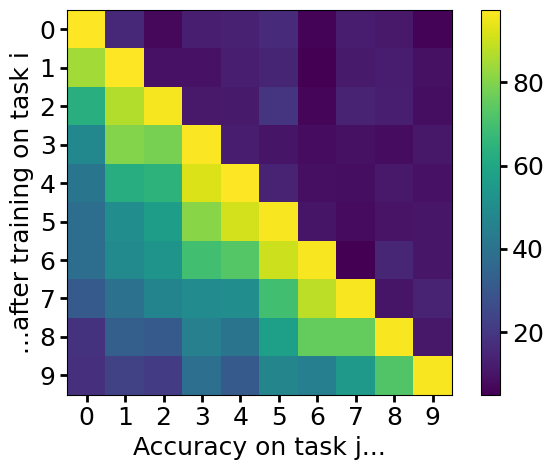

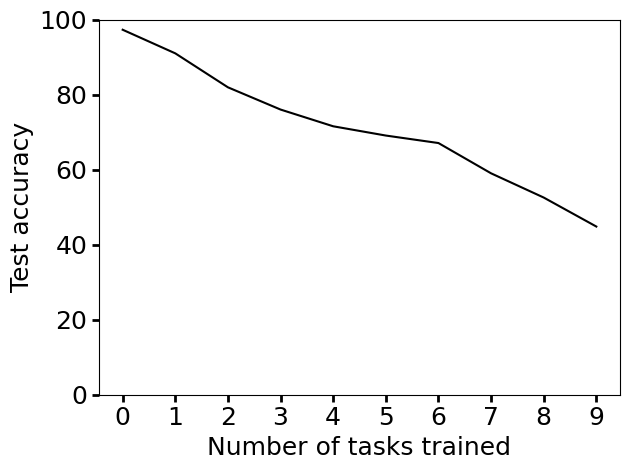

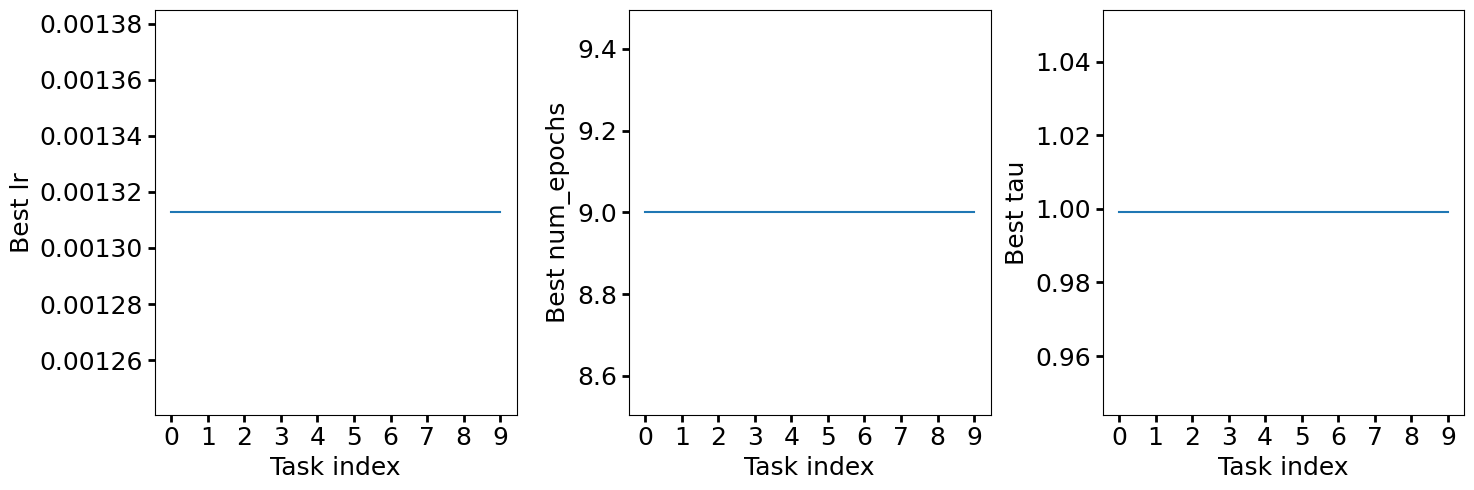

In [10]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [11]:
print(best_params_list)

[{'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}, {'lr': 0.0013127245462383958, 'num_epochs': 9, 'tau': 0.9990507149688213}]


In [12]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/9 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 11%|█         | 1/9 [00:06<00:50,  6.26s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 22%|██▏       | 2/9 [00:12<00:43,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 33%|███▎      | 3/9 [00:18<00:37,  6.24s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 44%|████▍     | 4/9 [00:25<00:31,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 56%|█████▌    | 5/9 [00:31<00:25,  6.27s/it]

In and out sizes :
fc1 : in = 784, out = 300
fc2 : in = 300, out = 300
fc3 : in = 300, out = 10
Non frozen params in layer 1 : tensor(90000., device='cuda:2')
Non frozen params in layer 2 : tensor(3000., device='cuda:2')


 56%|█████▌    | 5/9 [00:34<00:27,  7.00s/it]


KeyboardInterrupt: 

## Visualize validation

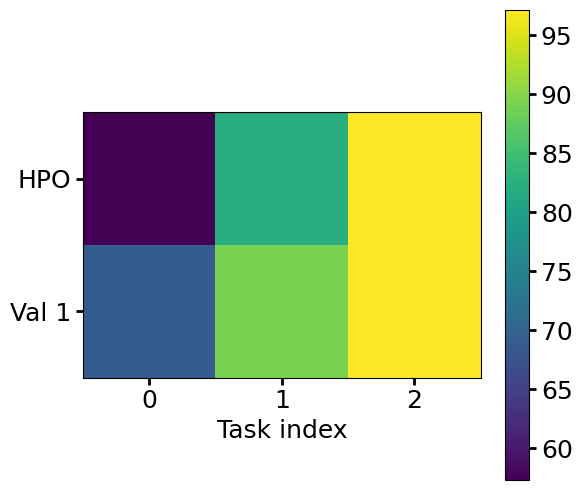

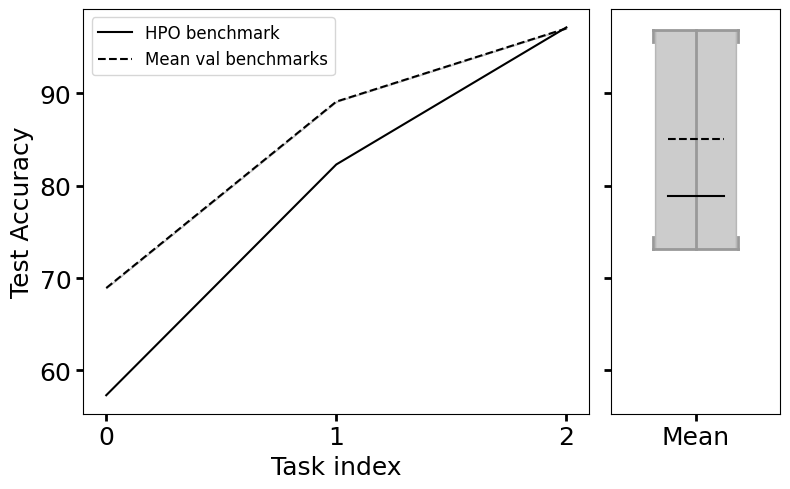

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)